## 이미지 데이터 로딩

In [1]:
from tensorflow.keras.datasets import mnist # mnist module.load_data()

# 튜플 형식으로 반환 (0,1),(0,1)
(train_image, train_labels),(test_image, test_labels)=mnist.load_data()

### 데이터 구조 확인

In [33]:
# 학습 데이터 / 학습 데이터의 답
train_image.shape, train_labels.shape

((60000, 784), (60000,))

In [3]:
# 첫번째 이미지
print(train_labels[0]) # 첫번째 이미지의 답
train_image[0] # 5라는 숫자 이미지

5


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## 신경망 생성 : 모델 생성

In [4]:
from tensorflow import keras # keras module (변수, 함수, 클래스 존재)
from tensorflow.keras import layers

model = keras.Sequential([ # Sequential = 순차적 처리 => forward (자동 미분)
    layers.Dense(512, activation='relu') # 밀집층 생성, 784=>512, 차원축소, 특성 추출, relu=비선형 함수
    , layers.Dense(512, activation='relu') # 학습을 활성화
    , layers.Dense(10) # 출력층
])

In [5]:
# loss function(오차구하는 함수), optimizer(역전파 - 미분,학습), metric(평가지표)
model.compile(
      optimizer='adam'
    , loss='sparse_categorical_crossentropy'
    , metrics=['accuracy'] # 여러 개가 들어갈수 있어서 리스트, 정확도만 확인
)
# 신경망 완성

In [6]:
test_image.shape

(10000, 28, 28)

In [7]:
# 학습 데이터 준비(60000,28,28) : 2차원 (28X28) => 1차원 변경 필요 (784)
train_image=train_image.reshape(60000,28*28)
# 0 ~ 1 사이 값으로 변환
train_image=train_image.astype('float32')/255 # GPU 연산은 float16이 제일 빠름

# 테스트 데이터 동일 처리(10000, 28, 28)
test_image=test_image.reshape(10000,28*28)
# 0 ~ 1 사이 값으로 변환
test_image=test_image.astype('float')/255

## 학습 진행

In [8]:
model.fit(
      train_image      # 학습 데이터
    , train_labels     # 학습 데이터의 답
    , epochs=5         # 전체 데이터에 대한 반복 학습 횟수
    , batch_size=128   # 한번 학습(미분)시 사용할 데이터 포인트 개수, 한개씩하면 속도 느려짐 + 이상치 민감해짐
)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 2.5274 - accuracy: 0.1172
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3025 - accuracy: 0.1018
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 2.3025 - accuracy: 0.1019
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 2.3025 - accuracy: 0.1019
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 2.3025 - accuracy: 0.1019


In [9]:
60000/128

468.75

In [10]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])


model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255


model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2543 - accuracy: 0.9266
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1028 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0678 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0494 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0374 - accuracy: 0.9887


## 검증

In [11]:
# 테스트 이미지 10개 가지고 와서 
test_digits=test_image[:10]

# 모델에 집어넣어서 예측값(10개) / 1개의 예측값에는 10개 출력 
predictions=model.predict(test_digits)
print(predictions[0]) # 10개 결과 출력

# => argmax
print(predictions[0].argmax()) # 최대값을 가지고 있는 인덱스 반환
print(predictions[0][7]) # 확률

# 테스트 데이터 첫번째 이미지의 원래 답
print(f'테스트 데이터 첫번째 이미지 답 : {test_labels[0]}')

1/1 [==============================] - 0s 83ms/step
[4.1770325e-09 9.4311703e-12 4.3419070e-07 2.5522735e-05 2.2151924e-12
 1.2426467e-07 2.3172170e-14 9.9997151e-01 1.3317771e-08 2.4285996e-06]
7
0.9999715
테스트 데이터 첫번째 이미지 답 : 7


In [12]:
test_loss, test_acc = model.evaluate(test_image, test_labels) # 테스트이미지, 답
print(f'테스트 이미지에 대한 모델 정확도 : {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0753 - accuracy: 0.9771
테스트 이미지에 대한 모델 정확도 : 0.9771000146865845


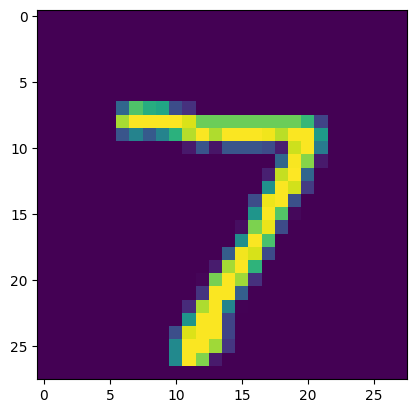

In [13]:
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images[0])
plt.show()

313/313 [==============================] - 1s 2ms/step
테스트 이미지에 대한 예측값 : 5
원래답 : 5


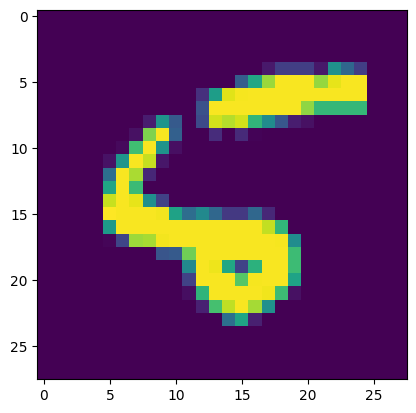

In [14]:
predictions = model.predict(test_image)
idx=8
print(f'테스트 이미지에 대한 예측값 : {predictions[idx].argmax()}')
print(f'원래답 : {test_labels[idx]}')

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images[idx])
plt.show()

## 예측값과 원래값이 불일치 한거

In [15]:
## 예측값 == 원래값 => boolean
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])


model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255


model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2555 - accuracy: 0.9267
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1018 - accuracy: 0.9700
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0678 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0486 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0367 - accuracy: 0.9892


In [16]:
import pandas as pd

predictions = model.predict(test_images)
predictions[0].argmax()
predictions_value = [pred.argmax() for pred in predictions]

313/313 [==============================] - 1s 2ms/step


In [17]:
len(predictions)

10000

In [18]:
pred_value = []

for prediction in predictions:
    pred_value.append(prediction.argmax())

pred_value

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [19]:
# 결과 저장 데이터프레임 생성
result_df = pd.DataFrame({
    '예측값':predictions_value
    , '원래값':test_labels
})
result_df.head()

,예측값,원래값
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


313/313 [==============================] - 1s 2ms/step
원래답 : 5
예측값 : 6


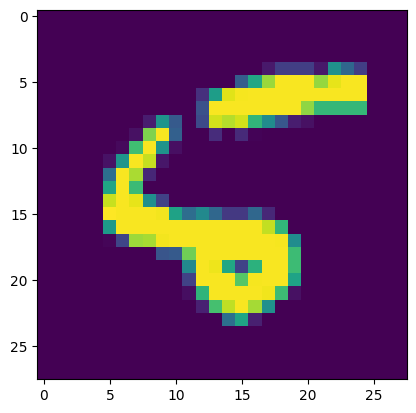

원래답 : 4
예측값 : 6


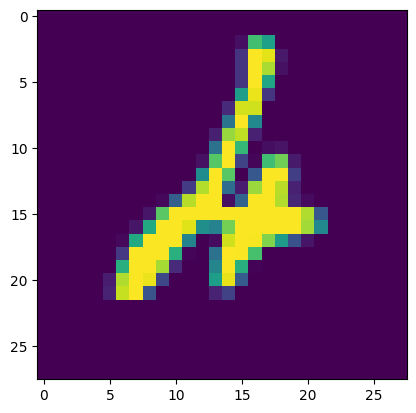

원래답 : 6
예측값 : 0


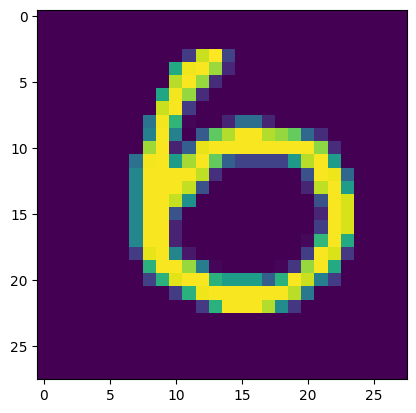

원래답 : 2
예측값 : 7


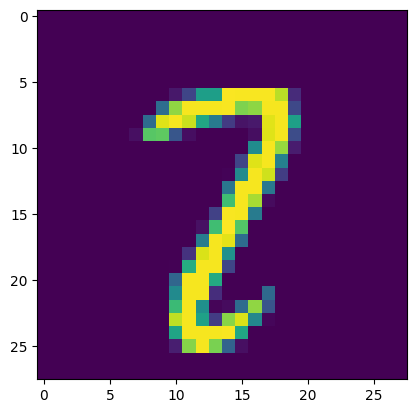

원래답 : 5
예측값 : 3


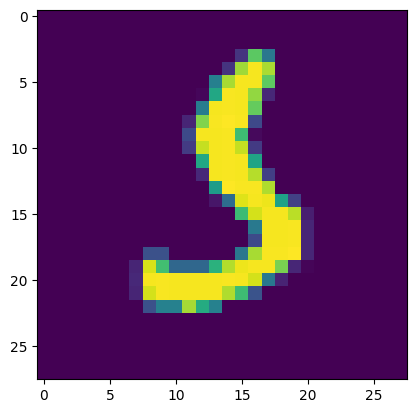

In [20]:
# 예측값 == 원래값 => boolean
import pandas as pd
predictions=model.predict(test_images).argmax(axis=1)
# 결과 저장 데이터프레임 생성
result_df=pd.DataFrame({
    '예측값':predictions
    ,'원래값':test_labels
})
result_df['bool']=result_df['예측값']==result_df['원래값']
false_labels_indexs=result_df[result_df['bool']==False].index


for idx in false_labels_indexs[:5]:
    print(f'원래답 : {test_labels[idx]}')
    print(f'예측값 : {predictions[idx]}')
    plt.imshow(test_images[idx].reshape((28,28)))
    plt.show()
    

In [38]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [39]:
# 학습 이미지의 차원,구조 확인 
train_images.ndim, train_images.shape

(3, (60000, 28, 28))

In [23]:
from tensorflow.keras.datasets import mnist
(train_images, train_images),(test_images, test_labels)=mnist.load_data()

In [29]:
# 학습 이미지의 차원 확인
train_image.ndim, train_image.shape

(2, (60000, 784))

In [40]:
import matplotlib.pyplot as plt
digit = train_images[4]
digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [41]:
my_slice=train_images[10:100]
my_slice.shape

(90, 28, 28)

In [42]:
my_slice=train_images[10:100, 0:28,0:28]
my_slice.shape

(90, 28, 28)

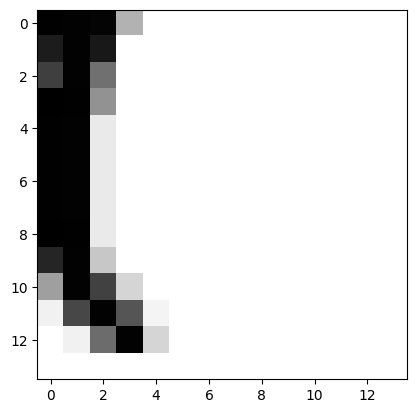

In [43]:
my_slice=train_images[4, 14:,14:]
my_slice.shape
plt.imshow(my_slice, cmap=plt.cm.binary)

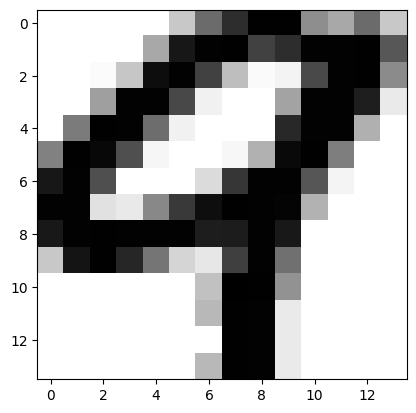

In [45]:
my_slice=train_images[:,7]
my_slice = train_images[4,7:-7,7:-7]
plt.imshow(my_slice,cmap=plt.cm.binary)
plt.show()

In [46]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x


In [47]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x


In [48]:
import time
import numpy as np

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.6f} s".format(time.time() - t0))


걸린 시간: 0.005002 s


In [49]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))


걸린 시간: 1.64 s


In [50]:
import requests
from bs4 import BeautifulSoup

url = 'https://map.naver.com/v5/search/맛집'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# 특정 데이터 추출
for item in soup.find_all('div', class_='restaurant'):
    name = item.find('span', class_='name').text
    address = item.find('span', class_='address').text
    print(name, address)


In [52]:
from selenium import webdriver

driver = webdriver.Chrome()
driver.get('https://map.naver.com/v5/search/맛집')

# 스크롤을 내리거나 특정 버튼을 클릭하여 추가 데이터를 로드
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

# 필요한 요소를 찾고 데이터를 추출
items = driver.find_elements_by_class_name('restaurant')
for item in items:
    name = item.find_element_by_class_name('name').text
    address = item.find_element_by_class_name('address').text
    print(name, address)


AttributeError: 'WebDriver' object has no attribute 'find_elements_by_class_name'

In [54]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

# 셀레니움 설정
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# 특정 장소의 네이버 지도 리뷰 페이지 URL
url = "https://map.naver.com/v5/entry/place/PLACE_ID"

# URL 열기
driver.get(url)

# 페이지 로딩 대기
time.sleep(5)

# 리뷰 데이터 가져오기
reviews = []
review_elements = driver.find_elements(By.CLASS_NAME, 'YeINN')

for element in review_elements:
    review_text = element.text
    reviews.append(review_text)

driver.quit()

# 리뷰 출력
for idx, review in enumerate(reviews, 1):
    print(f"Review {idx}: {review}")


In [55]:
from selenium.webdriver.common.by import By
from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import re
from selenium.webdriver.common.keys import Keys
import time
import requests
출처: https://jinooh.tistory.com/32 [글쎄요, 아직 잘 모릅니다.:티스토리]

SyntaxError: invalid syntax (4047385786.py, line 11)

In [56]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
import time
from bs4 import BeautifulSoup
import requests

# 크롬 드라이버 설정 및 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# 네이버 지도 특정 장소 리뷰 페이지로 이동
place_id = "PLACE_ID"  # PLACE_ID를 원하는 장소 ID로 변경
url = f"https://map.naver.com/v5/entry/place/{place_id}"
driver.get(url)

# 페이지 로딩 대기
time.sleep(5)

# 리뷰 데이터를 로드하기 위해 페이지 스크롤 (필요한 만큼 반복)
for i in range(10):
    driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
    time.sleep(2)

# 페이지 소스 가져오기
page_source = driver.page_source

# BeautifulSoup을 사용하여 HTML 파싱
soup = BeautifulSoup(page_source, "html.parser")

# 리뷰 텍스트 추출
reviews = soup.find_all("span", {"class": "WoYOw"})

# 수집한 리뷰 출력
for idx, review in enumerate(reviews, 1):
    print(f"Review {idx}: {review.text}")

# 브라우저 닫기
driver.quit()


In [57]:
python naver_map_reviews.py


SyntaxError: invalid syntax (220671333.py, line 1)

In [59]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
import time
from bs4 import BeautifulSoup
import pandas as pd

# 크롬 드라이버 설정 및 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# 네이버 지도 특정 장소 리뷰 페이지로 이동
place_id = "20694317"  # PLACE_ID를 원하는 장소 ID로 변경
url = f"https://map.naver.com/v5/entry/place/{place_id}"
driver.get(url)

# 페이지 로딩 대기
time.sleep(5)

# 더 많은 리뷰 로드를 위해 페이지 스크롤 (필요한 만큼 반복)
scroll_pause_time = 2  # 각 스크롤 후 대기 시간
scroll_count = 20  # 스크롤 반복 횟수

for i in range(scroll_count):
    driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
    time.sleep(scroll_pause_time)

# 페이지 소스 가져오기
page_source = driver.page_source

# BeautifulSoup을 사용하여 HTML 파싱
soup = BeautifulSoup(page_source, "html.parser")

# 리뷰 텍스트 추출
review_elements = soup.find_all("span", {"class": "WoYOw"})

# 추출한 리뷰를 리스트에 저장
reviews = [review.text for review in review_elements]

# 브라우저 닫기
driver.quit()

# 리뷰 데이터를 DataFrame으로 변환
df = pd.DataFrame(reviews, columns=["Review"])

# 데이터프레임을 CSV 파일로 저장
csv_filename = "naver_map_reviews.csv"
df.to_csv(csv_filename, index=False, encoding='utf-8-sig')

print(f"총 {len(reviews)}개의 리뷰가 수집되었습니다.")
print(f"수집된 리뷰가 {csv_filename} 파일에 저장되었습니다.")


총 0개의 리뷰가 수집되었습니다.
수집된 리뷰가 naver_map_reviews.csv 파일에 저장되었습니다.


In [60]:
import requests

# 네이버 API 키 설정
client_id = 'YOUR_CLIENT_ID'
client_secret = 'YOUR_CLIENT_SECRET'

# 검색어 및 지역 설정
query = '강남 맛집'
display = 100  # 한 번에 가져올 결과 수 (최대 100)
start = 1      # 검색 시작 위치
sort = 'random'  # 정렬 방식 (random, comment 등)

# API 요청 URL
url = f"https://openapi.naver.com/v1/search/local.json?query={query}&display={display}&start={start}&sort={sort}"

# API 요청 헤더
headers = {
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret
}

# API 요청
response = requests.get(url, headers=headers)

# 결과 파싱
if response.status_code == 200:
    data = response.json()
    for item in data['items']:
        title = item['title']
        address = item['address']
        place_id = item['link'].split('/')[-1]  # 링크에서 PLACE_ID 추출
        print(f"가게 이름: {title}, 주소: {address}, PLACE_ID: {place_id}")
else:
    print("Error:", response.status_code)


Error: 401


In [63]:
import tensorflow as tf

x=tf.Variable(0.)
with tf.GradientTape as tape: # 기록 뿐, 실행x
    y = 2 * x + 3
grad_of_y_wrt_x=tape.gradient(y,x) #여기서 실행
grad_of_y_wrt_x

AttributeError: __enter__

In [64]:

x = tf.Variable(tf.zeros((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)


In [65]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
grad_of_y_wrt_W_and_b


[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.52922225, 0.52922225],
        [0.34817624, 0.34817624]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [67]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()


In [72]:
# NN 생성 = 생성 그래프
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(512,activation='relu')
    ,layers.Dense(512,activation='relu')
    
    , layers.Dense(10, activation='softmax')
  
])
model.compile(
      optimizer='rmsprop'
    , loss='sparse_categorical_crossentropy'
    , metrics=['accuracy']
  
)

# 데이터 정규화
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape(10000,28*28)
test_images=test_images.astype('float32')/255

model.fit(
  train_images
  , train_labels
  , epochs=5
  , batch_size=128
  
)



model.summary()


Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 2.3016 - accuracy: 0.1120
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 2.3009 - accuracy: 0.1124
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                     

In [73]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]


In [74]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights
     
     #시퀀설


In [75]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4
# 시퀀설 실행

In [76]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels


In [77]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss


In [81]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)


In [82]:

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)


In [83]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")


In [84]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)


에포크 0
0번째 배치 손실: 5.05
100번째 배치 손실: 2.26
200번째 배치 손실: 2.23
300번째 배치 손실: 2.12
400번째 배치 손실: 2.23
에포크 1
0번째 배치 손실: 1.92
100번째 배치 손실: 1.90
200번째 배치 손실: 1.86
300번째 배치 손실: 1.75
400번째 배치 손실: 1.85
에포크 2
0번째 배치 손실: 1.59
100번째 배치 손실: 1.60
200번째 배치 손실: 1.53
300번째 배치 손실: 1.44
400번째 배치 손실: 1.53
에포크 3
0번째 배치 손실: 1.33
100번째 배치 손실: 1.36
200번째 배치 손실: 1.25
300번째 배치 손실: 1.22
400번째 배치 손실: 1.29
에포크 4
0번째 배치 손실: 1.13
100번째 배치 손실: 1.17
200번째 배치 손실: 1.05
300번째 배치 손실: 1.05
400번째 배치 손실: 1.12
에포크 5
0번째 배치 손실: 0.99
100번째 배치 손실: 1.03
200번째 배치 손실: 0.91
300번째 배치 손실: 0.93
400번째 배치 손실: 1.00
에포크 6
0번째 배치 손실: 0.88
100번째 배치 손실: 0.92
200번째 배치 손실: 0.81
300번째 배치 손실: 0.84
400번째 배치 손실: 0.91
에포크 7
0번째 배치 손실: 0.79
100번째 배치 손실: 0.84
200번째 배치 손실: 0.73
300번째 배치 손실: 0.77
400번째 배치 손실: 0.84
에포크 8
0번째 배치 손실: 0.73
100번째 배치 손실: 0.77
200번째 배치 손실: 0.67
300번째 배치 손실: 0.71
400번째 배치 손실: 0.79
에포크 9
0번째 배치 손실: 0.68
100번째 배치 손실: 0.71
200번째 배치 손실: 0.62
300번째 배치 손실: 0.67
400번째 배치 손실: 0.74


In [86]:
# 모델 평가
predictions = model(test_images) # tf.Variable object
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels # test_labels와 같은 게 몇개냐 
print(f"정확도: {matches.mean():.6f}")


정확도: 0.816400
